In [30]:
import torch
import matplotlib.pyplot as plt

In [31]:
X = torch.linspace(0, 1, 10).view((-1, 1))

print(X)

true_slope = 0.5
true_intercept = 1

y = true_slope * X + true_intercept * torch.rand(X.size())
y = y.view((1, len(y)))

print(f"y: {y}")

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
y: tensor([[0.1419, 0.6046, 1.0966, 0.7629, 0.8530, 0.8430, 0.3638, 0.9036, 1.2492,
         1.2405]])


In [38]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1) # h0 = w0 + w1x
        
    def forward(self, x):
        x = self.linear(x)
        return x
    
model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

number_of_epochs = 100
losses = []

for epoch in range(number_of_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    model.zero_grad() # Zeroing gradients/ clearing
    loss.backward() # Calculating gradients/ error propagating
    optimizer.step() # using gradients to update weights
    print(f"Epoch: {epoch}/{number_of_epochs}, loss: {loss}")
    losses.append(float(loss))

print(losses)

Epoch: 0/100, loss: 0.2463241070508957
Epoch: 1/100, loss: 0.24530227482318878
Epoch: 2/100, loss: 0.24428531527519226
Epoch: 3/100, loss: 0.24327325820922852
Epoch: 4/100, loss: 0.24226613342761993
Epoch: 5/100, loss: 0.24126414954662323
Epoch: 6/100, loss: 0.24026726186275482
Epoch: 7/100, loss: 0.23927558958530426
Epoch: 8/100, loss: 0.23828917741775513
Epoch: 9/100, loss: 0.23730815947055817
Epoch: 10/100, loss: 0.23633256554603577
Epoch: 11/100, loss: 0.2353624701499939
Epoch: 12/100, loss: 0.23439793288707733
Epoch: 13/100, loss: 0.23343896865844727
Epoch: 14/100, loss: 0.23248575627803802
Epoch: 15/100, loss: 0.23153820633888245
Epoch: 16/100, loss: 0.23059648275375366
Epoch: 17/100, loss: 0.22966055572032928
Epoch: 18/100, loss: 0.22873052954673767
Epoch: 19/100, loss: 0.22780638933181763
Epoch: 20/100, loss: 0.22688813507556915
Epoch: 21/100, loss: 0.2259759157896042
Epoch: 22/100, loss: 0.22506973147392273
Epoch: 23/100, loss: 0.2241695523262024
Epoch: 24/100, loss: 0.2232755

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


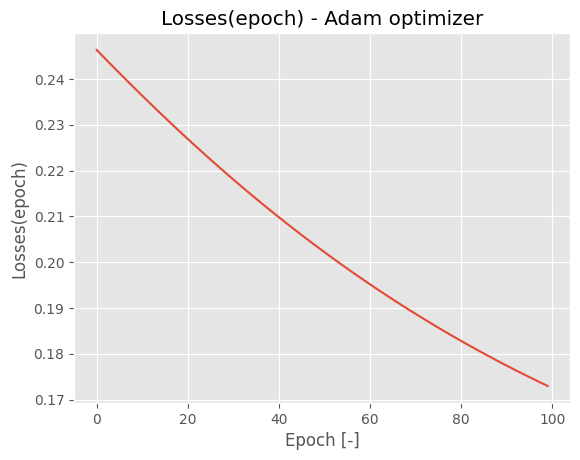

Text(0.5, 1.0, 'Salary(age) - Adam optimizer')

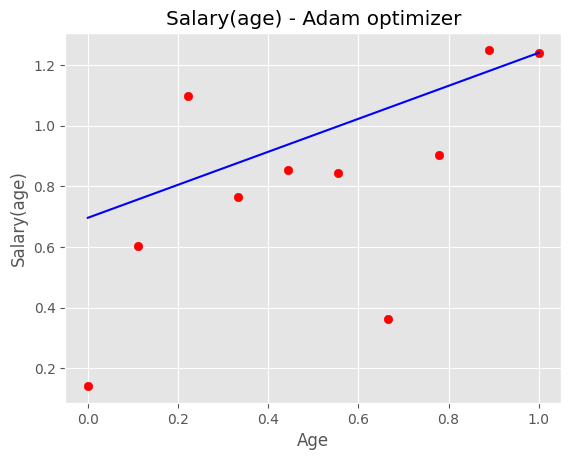

In [57]:
plt.style.use("ggplot")
plt.plot(range(len(losses)), losses)
plt.grid(True)
plt.title("Losses(epoch) - Adam optimizer")
plt.xlabel("Epoch [-]")
plt.ylabel("Losses(epoch)")
plt.show()


plt.style.use("ggplot")
plt.scatter(X, y, color="red")
plt.grid(True)
plt.plot(X.numpy(), model(X).detach(), color="blue")
plt.xlabel("Age")
plt.ylabel("Salary(age)")
plt.title("Salary(age) - Adam optimizer")